In [60]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

!pip install openpyxl

In [61]:
df = pd.read_excel('./Date_Fruit_Datasets.xlsx')

In [63]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    #mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    #mi_scores = mi_scores.sort_values(ascending=False)

In [64]:
X=df.copy()
y=X.pop('Class')

y_MI=y.copy()

y_MI=y_MI.replace(regex={'BERHI': 1, 'DEGLET': 2,
              'DOKOL': 3, 'IRAQI': 4,
              'ROTANA': 5, 'SAFAVI': 6,
              'SOGAY': 7})

cols_with_missing = [col for col in X.columns
                     if X[col].isnull().any()]
X_r=X.drop(cols_with_missing, axis=1)
nan_value = float("NaN")
X_r.replace(0, nan_value, inplace=True)
X_r.replace("", nan_value, inplace=True)
X_r.dropna(how='all', axis=1, inplace=True)

input_shape = [X.shape[1]]


In [65]:
train_X, val_X, train_y, val_y = train_test_split(X_r, y_MI, random_state = 0)

In [66]:
#Using normal Dense layers
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=8),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [67]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
6/6 [==============================] - 0s 28ms/step - loss: 1647094784.0000 - val_loss: 825954304.0000
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 651583104.0000 - val_loss: 552355840.0000
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 538462016.0000 - val_loss: 239617056.0000
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 343633504.0000 - val_loss: 230949104.0000
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 214420128.0000 - val_loss: 153324128.0000
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 141238480.0000 - val_loss: 92146864.0000
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 103374248.0000 - val_loss: 72377392.0000
Epoch 8/200
6/6 [==============================] - 0s 10ms/step - loss: 85705232.0000 - val_loss: 63967804.0000
Epoch 9/200
6/6 [==============================] - 0s 9ms/step - loss: 75624312.0000 - val_lo

6/6 [==============================] - 0s 9ms/step - loss: 2806739.0000 - val_loss: 2389554.7500
Epoch 75/200
6/6 [==============================] - 0s 11ms/step - loss: 2344936.5000 - val_loss: 1981527.8750
Epoch 76/200
6/6 [==============================] - 0s 11ms/step - loss: 2805518.7500 - val_loss: 2318299.0000
Epoch 77/200
6/6 [==============================] - 0s 10ms/step - loss: 2487332.5000 - val_loss: 2615173.7500
Epoch 78/200
6/6 [==============================] - 0s 9ms/step - loss: 2465140.5000 - val_loss: 3520815.2500
Epoch 79/200
6/6 [==============================] - 0s 10ms/step - loss: 3235745.2500 - val_loss: 2324763.0000
Epoch 80/200
6/6 [==============================] - 0s 11ms/step - loss: 2557592.7500 - val_loss: 2371846.5000
Epoch 81/200
6/6 [==============================] - 0s 8ms/step - loss: 2232574.0000 - val_loss: 2523416.7500
Epoch 82/200
6/6 [==============================] - 0s 11ms/step - loss: 2425505.7500 - val_loss: 2056074.7500
Epoch 83/200
6/6 

6/6 [==============================] - 0s 10ms/step - loss: 94.8552 - val_loss: 5020.5723
Epoch 150/200
6/6 [==============================] - 0s 9ms/step - loss: 64.4212 - val_loss: 4944.5493
Epoch 151/200
6/6 [==============================] - 0s 9ms/step - loss: 50.3283 - val_loss: 4916.7769
Epoch 152/200
6/6 [==============================] - 0s 9ms/step - loss: 47.7348 - val_loss: 4914.9312
Epoch 153/200
6/6 [==============================] - 0s 9ms/step - loss: 162.3186 - val_loss: 4896.8560
Epoch 154/200
6/6 [==============================] - 0s 8ms/step - loss: 184.8541 - val_loss: 4753.8628
Epoch 155/200
6/6 [==============================] - 0s 8ms/step - loss: 149.2686 - val_loss: 4633.9966
Epoch 156/200
6/6 [==============================] - 0s 8ms/step - loss: 117.9482 - val_loss: 4626.6870
Epoch 157/200
6/6 [==============================] - 0s 10ms/step - loss: 82.5183 - val_loss: 4691.9937
Epoch 158/200
6/6 [==============================] - 0s 10ms/step - loss: 33.9728

In [68]:
history_dense = pd.DataFrame(history.history)


In [69]:
#Using normal Dense layers and dropout
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [70]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
6/6 [==============================] - 0s 30ms/step - loss: 4450116608.0000 - val_loss: 285511840.0000
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 1148447744.0000 - val_loss: 571856640.0000
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 792097536.0000 - val_loss: 338620928.0000
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 491902944.0000 - val_loss: 90518232.0000
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 340675520.0000 - val_loss: 98208608.0000
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 242312768.0000 - val_loss: 42997588.0000
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 195786416.0000 - val_loss: 10897591.0000
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 165557184.0000 - val_loss: 29595496.0000
Epoch 9/200
6/6 [==============================] - 0s 11ms/step - loss: 153014464.0000 - va

6/6 [==============================] - 0s 10ms/step - loss: 270828.1562 - val_loss: 3.7862
Epoch 79/200
6/6 [==============================] - 0s 11ms/step - loss: 266544.1562 - val_loss: 3.7768
Epoch 80/200
6/6 [==============================] - 0s 10ms/step - loss: 116508.5391 - val_loss: 3.7674
Epoch 81/200
6/6 [==============================] - 0s 9ms/step - loss: 112380.4375 - val_loss: 3.7580
Epoch 82/200
6/6 [==============================] - 0s 10ms/step - loss: 328982.8438 - val_loss: 3.7486
Epoch 83/200
6/6 [==============================] - 0s 8ms/step - loss: 201026.8594 - val_loss: 3.7392
Epoch 84/200
6/6 [==============================] - 0s 11ms/step - loss: 168871.7500 - val_loss: 3.7300
Epoch 85/200
6/6 [==============================] - 0s 11ms/step - loss: 204469.2344 - val_loss: 3.7209
Epoch 86/200
6/6 [==============================] - 0s 12ms/step - loss: 145704.5156 - val_loss: 3.7117
Epoch 87/200
6/6 [==============================] - 0s 10ms/step - loss: 88891.

Epoch 157/200
6/6 [==============================] - 0s 12ms/step - loss: 32864.9570 - val_loss: 3.1417
Epoch 158/200
6/6 [==============================] - 0s 11ms/step - loss: 53350.5859 - val_loss: 3.1347
Epoch 159/200
6/6 [==============================] - 0s 9ms/step - loss: 57609.4258 - val_loss: 3.1277
Epoch 160/200
6/6 [==============================] - 0s 11ms/step - loss: 53670.9648 - val_loss: 3.1206
Epoch 161/200
6/6 [==============================] - 0s 11ms/step - loss: 67548.3359 - val_loss: 3.1136
Epoch 162/200
6/6 [==============================] - 0s 10ms/step - loss: 1280.6064 - val_loss: 3.1067
Epoch 163/200
6/6 [==============================] - 0s 12ms/step - loss: 53155.8086 - val_loss: 3.0997
Epoch 164/200
6/6 [==============================] - 0s 16ms/step - loss: 65746.4219 - val_loss: 3.0928
Epoch 165/200
6/6 [==============================] - 0s 16ms/step - loss: 16726.0000 - val_loss: 3.0858
Epoch 166/200
6/6 [==============================] - 0s 18ms/step 

In [71]:
history_DD = pd.DataFrame(history.history)


In [72]:
#Using normal Dense layers, dropout and batch normalization
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

In [73]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=200,
)

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6/6 [==============================] - 0s 44ms/step - loss: 4.2487 - val_loss: 2.4267
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 4.0652 - val_loss: 2.0651
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 3.8875 - val_loss: 2.7611
Epoch 4/200
6/6 [==============================] - 0s 14ms/step - loss: 3.7334 - val_loss: 1.6595
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 3.5622 - val_loss: 2.0624
Epoch 6/200
6/6 [=

6/6 [==============================] - 0s 15ms/step - loss: 0.7106 - val_loss: 0.9525
Epoch 77/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6881 - val_loss: 0.8694
Epoch 78/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6938 - val_loss: 0.9371
Epoch 79/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6324 - val_loss: 0.8868
Epoch 80/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6736 - val_loss: 1.2389
Epoch 81/200
6/6 [==============================] - 0s 11ms/step - loss: 0.6237 - val_loss: 2.1483
Epoch 82/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6459 - val_loss: 1.9226
Epoch 83/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6454 - val_loss: 2.2407
Epoch 84/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6252 - val_loss: 1.9967
Epoch 85/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6049 - val_loss: 2.2363
Epoch 86/200
6/6 [=====

6/6 [==============================] - 0s 16ms/step - loss: 0.4428 - val_loss: 1.1052
Epoch 159/200
6/6 [==============================] - 0s 15ms/step - loss: 0.4486 - val_loss: 0.7940
Epoch 160/200
6/6 [==============================] - 0s 16ms/step - loss: 0.3875 - val_loss: 1.0506
Epoch 161/200
6/6 [==============================] - 0s 15ms/step - loss: 0.4462 - val_loss: 0.9962
Epoch 162/200
6/6 [==============================] - 0s 16ms/step - loss: 0.3994 - val_loss: 1.6608
Epoch 163/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4277 - val_loss: 1.6521
Epoch 164/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4071 - val_loss: 1.6481
Epoch 165/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3952 - val_loss: 1.2052
Epoch 166/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4445 - val_loss: 0.9869
Epoch 167/200
6/6 [==============================] - 0s 16ms/step - loss: 0.3781 - val_loss: 0.9821
Epoch 168/200


In [74]:
history_DDB = pd.DataFrame(history.history)

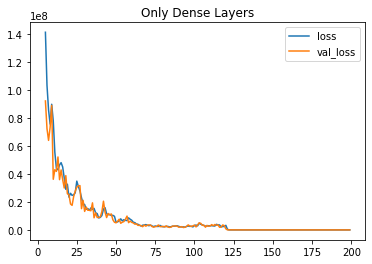

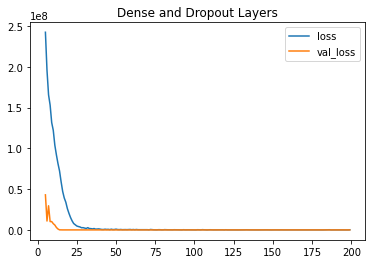

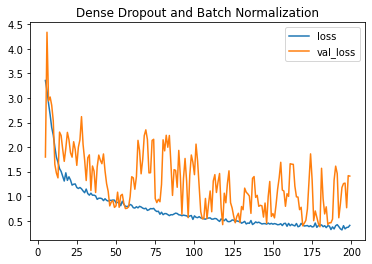

In [75]:
history_dense.loc[5:, ['loss','val_loss']].plot(title="Only Dense Layers");
history_DD.loc[5:, ['loss','val_loss']].plot(title="Dense and Dropout Layers");
history_DDB.loc[5:, ['loss','val_loss']].plot(title="Dense Dropout and Batch Normalization");



In [81]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, 
    patience=10, 
    restore_best_weights=True,
)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=128,
    epochs=300,
    callbacks=[early_stopping]
)
history_DDB4 = pd.DataFrame(history.history)

Epoch 1/300
6/6 [==============================] - 0s 22ms/step - loss: 0.3366 - val_loss: 1.0236
Epoch 2/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3564 - val_loss: 1.3342
Epoch 3/300
6/6 [==============================] - 0s 13ms/step - loss: 0.3253 - val_loss: 1.3005
Epoch 4/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3644 - val_loss: 0.4239
Epoch 5/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3515 - val_loss: 0.9506
Epoch 6/300
6/6 [==============================] - 0s 13ms/step - loss: 0.3625 - val_loss: 0.5137
Epoch 7/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3315 - val_loss: 0.9981
Epoch 8/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3807 - val_loss: 0.8562
Epoch 9/300
6/6 [==============================] - 0s 15ms/step - loss: 0.3680 - val_loss: 1.1386
Epoch 10/300
6/6 [==============================] - 0s 14ms/step - loss: 0.3685 - val_loss: 0.7787
Epoch 11/300
6/6 [=

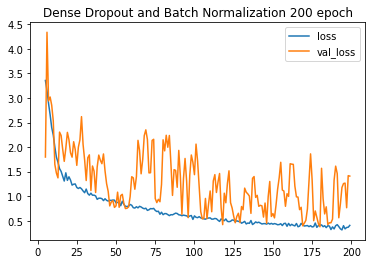

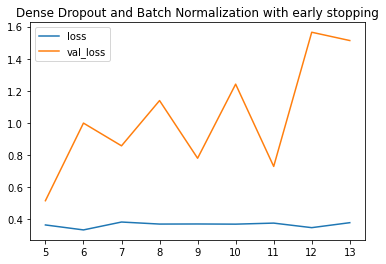

In [82]:

history_DDB.loc[5:, ['loss','val_loss']].plot(title="Dense Dropout and Batch Normalization 200 epoch");
history_DDB4.loc[5:, ['loss','val_loss']].plot(title="Dense Dropout and Batch Normalization with early stopping");